一阶模态有效质量: 6637304.45 kg
等效静风载响应位移: 0.0234 m
极值顶部位移 (考虑峰值因子 g=2.5): 0.0586 m


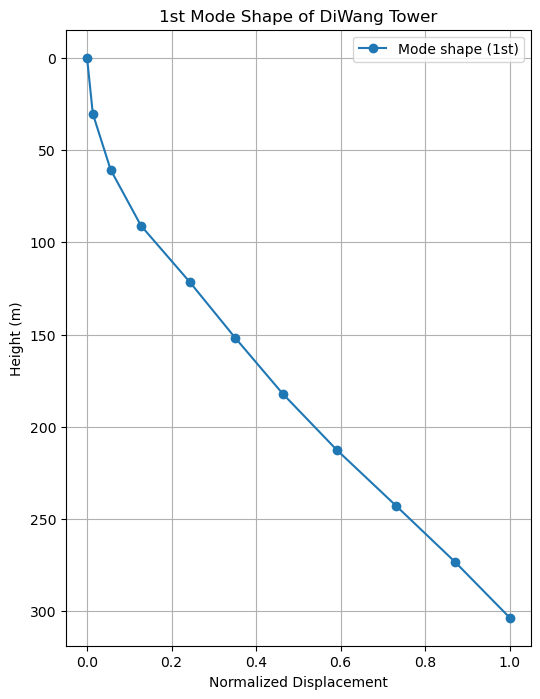

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 基础结构参数
# ----------------------------
H = 303.46  # 总高度 (m)
w0 = 0.75   # 设计风压 (kN/m^2)
T1 = 6.38   # 一阶周期 (s)
rho_air = 1.25  # 空气密度 (kg/m^3)
g = 2.5  # 峰值因子

# 横截面面积
B = 65.88  # 迎风宽度（m）
D = 35.5   # 垂直风向宽度（m）
A_ref = B * 1.0  # 单层参考面积（高度按 1m 计）

# ----------------------------
# 模态振型与质量分布数据
# ----------------------------
z_ratio = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
phi = np.array([0.0000, 0.0137, 0.0558, 0.1277, 0.2424, 0.3503, 0.4629, 0.5903, 0.7309, 0.8700, 1.0000])
mass = np.array([2500]*10 + [1500]) * 1000  # ton -> kg

z = z_ratio * H  # 实际高度

# ----------------------------
# 计算等效静风荷载
# ----------------------------
# 风压分布按常规常数分布处理
p_mean = w0 * 1000  # 转换为 N/m^2

# 每层的等效风荷载 (N)
F_static = p_mean * A_ref * phi

# ----------------------------
# 计算一阶振型下的等效风荷载响应
# ----------------------------
# 模态总质量
M_total = np.sum(mass * phi**2)

# 模态广义力
Q1 = np.sum(F_static * phi)

# 有效质量
M_eff = Q1**2 / (np.sum(F_static * phi)**2 / np.sum(mass * phi**2))

# 一阶模态频率
omega1 = 2 * np.pi / T1

# 动力放大因子（简化处理）
S_d = Q1 / (M_eff * omega1**2)  # 静位移响应（不含动态增益）

# 考虑峰值因子
u_peak = g * S_d

print(f"一阶模态有效质量: {M_eff:.2f} kg")
print(f"等效静风载响应位移: {S_d:.4f} m")
print(f"极值顶部位移 (考虑峰值因子 g={g}): {u_peak:.4f} m")

# ----------------------------
# 图示：一阶模态振型位移放大图
# ----------------------------
plt.figure(figsize=(6, 8))
plt.plot(phi, z, marker='o', label='Mode shape (1st)')
plt.xlabel('Normalized Displacement')
plt.ylabel('Height (m)')
plt.title('1st Mode Shape of DiWang Tower')
plt.grid(True)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


In [6]:
import scipy.io

# 替换为你实际的路径
mat_data = scipy.io.loadmat('windData.mat')  # 如果你上传后保存为 windData.mat

# 查看有哪些变量
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Z', 'U', 't', 'dt'])


print("Z shape:", mat_data['Z'].shape)
print("U shape:", mat_data['U'].shape)
print("t shape:", mat_data['t'].shape)
print("dt:", mat_data['dt'])


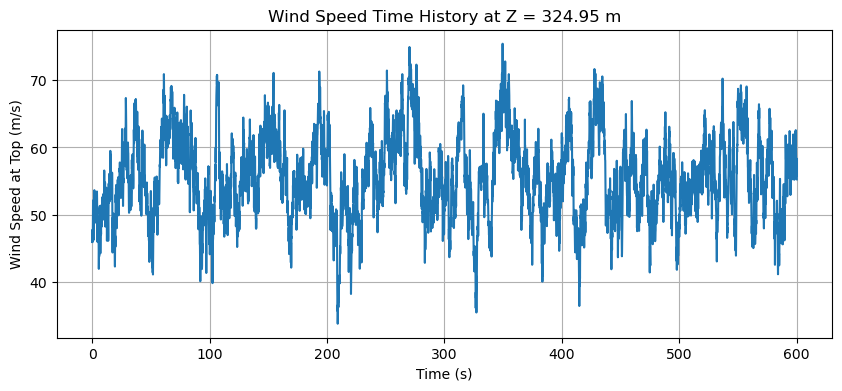

In [9]:
import matplotlib.pyplot as plt

U = mat_data['U']
t = mat_data['t'].flatten()
Z = mat_data['Z'].flatten()

# 假设我们查看顶层（最后一个高度）
index_top = -1  # 顶层在最后一个
u_top = U[index_top, :]  # 取顶层的风速

plt.figure(figsize=(10, 4))
plt.plot(t, u_top)
plt.xlabel('Time (s)')
plt.ylabel('Wind Speed at Top (m/s)')
plt.title(f'Wind Speed Time History at Z = {Z[index_top]:.2f} m')
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# 加载数据
mat_data = scipy.io.loadmat('windData.mat')
U = mat_data['U']          # shape (11, 6000)
t = mat_data['t'].flatten()
dt = float(mat_data['dt'].item())# 0.1s
Z = mat_data['Z'].flatten()

# 常数定义
rho = 1.225       # 空气密度 (kg/m³)
mu_s = 1.3        # 风压系数
width = 65.88     # 沿风宽度 (m)
dz = 303.46 / 10  # 每层高度（结构总高303.46m，分11层）
A_i = width * dz  # 每层受风面积（矩形）


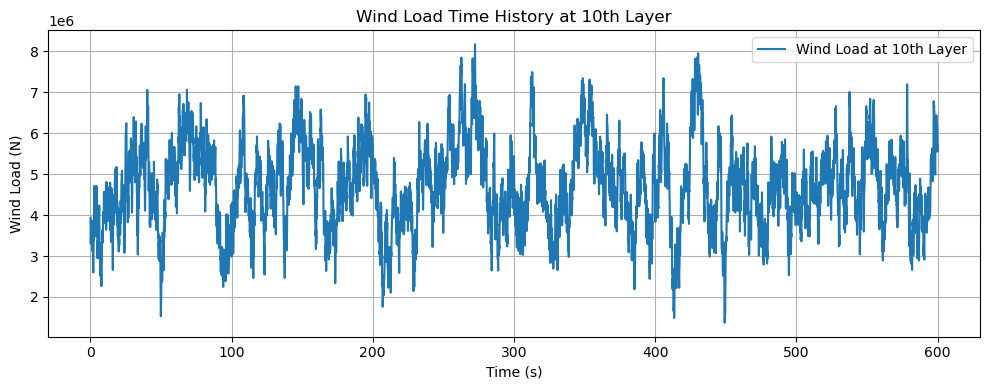

In [15]:
# Step 2: 计算风荷载时程 F_i(t)
rho = 1.225       # 空气密度 kg/m³
mu_s = 1.3        # 风压形状系数（假设相同）
width = 65.88     # 沿风宽度（m）
dz = 303.46 / 10  # 每层高，结构总高 303.46m，分10层，11个点
A_i = width * dz  # 每层受风面积（m²）

# 平均风速 ū 和扰动风速 u'
U_mean = np.mean(U, axis=1).reshape(-1, 1)     # 每层平均风速，shape: (11, 1)
U_prime = U - U_mean                           # 扰动风速，shape: (11, 6000)

# 计算风荷载时程，单位 N
F = ((0.5 * rho * U_mean**2 + rho * U_mean * U_prime) * mu_s * A_i)  # shape: (11, 6000)

# 可视化某一层的风荷载，例如第10层（index=9）
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(t, F[9], label="Wind Load at 10th Layer")
plt.xlabel("Time (s)")
plt.ylabel("Wind Load (N)")
plt.title("Wind Load Time History at 10th Layer")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# 模态振型（单位模态）
mode_shape = np.array([0.0000, 0.0137, 0.0558, 0.1277, 0.2424, 0.3503,
                       0.4629, 0.5903, 0.7309, 0.8700, 1.0000])

# 每层质量（kg）
mass = np.array([2500]*10 + [1500]) * 1000  # kg

# 等效模态荷载：F_modal(t) = φ_i * F_i(t) 累加
F_modal = np.dot(mode_shape, F)  # shape: (6000,)


In [18]:
# 模态参数
T1 = 6.38                  # 一阶周期（题目给出）
omega = 2 * np.pi / T1
zeta = 0.02                # 阻尼比
m_modal = np.sum(mass * mode_shape**2)
k_modal = m_modal * omega**2
c_modal = 2 * zeta * np.sqrt(k_modal * m_modal)

# 初始化响应数组
n = len(t)
u = np.zeros(n)
v = np.zeros(n)
a = np.zeros(n)

# 初始加速度
a[0] = (F_modal[0] - c_modal * v[0] - k_modal * u[0]) / m_modal

# Newmark-beta参数
beta = 1/4
gamma = 1/2

# 预计算
a1 = m_modal / (beta * dt**2) + gamma * c_modal / (beta * dt)
a2 = m_modal / (beta * dt) + (gamma / beta - 1) * c_modal
a3 = (1 / (2 * beta) - 1) * m_modal + dt * (gamma / (2 * beta) - 1) * c_modal
k_eff = k_modal + a1

# 主循环
for i in range(1, n):
    dp = F_modal[i] - F_modal[i-1] + a1 * u[i-1] + a2 * v[i-1] + a3 * a[i-1]
    du = dp / k_eff
    dv = gamma / (beta * dt) * (du - u[i-1]) + (1 - gamma / beta) * v[i-1] + dt * (1 - gamma / (2 * beta)) * a[i-1]
    da = (du - u[i-1]) / (beta * dt**2) - v[i-1] / (beta * dt) - a[i-1] / (2 * beta)
    
    u[i] = du
    v[i] = dv
    a[i] = da


 Estimated extreme top displacement: 0.4149 meters


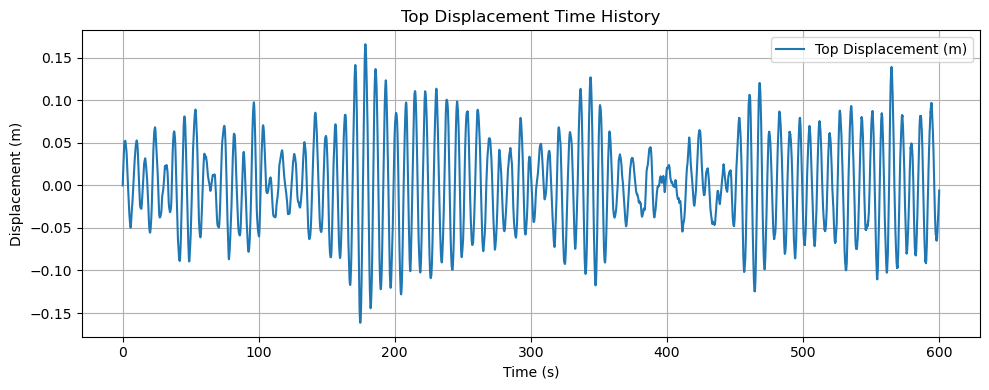

In [20]:
# 顶部模态参与系数为1，直接用 u(t)
u_top = u
g = 2.5  # 极值因子
u_extreme = np.max(np.abs(u_top)) * g

# 输出和可视化
print(f" Estimated extreme top displacement: {u_extreme:.4f} meters")

# 可视化响应
plt.figure(figsize=(10, 4))
plt.plot(t, u_top, label='Top Displacement (m)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Top Displacement Time History')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
